# Computer vision Foundation

# 1- Getting Started to Computer Vision Foundation

pip install opencv-python

In [1]:
import cv2
import numpy as np


In [2]:
bgr_img = cv2.imread('imgs/test1.jpg')

In [3]:
import cv2
print(cv2.__version__)

4.8.1


In [22]:
cv2.imshow('imgs/test1.jpg', bgr_img)
cv2.waitKey(0) # display without time
# cv2.waitKey(5000) # display 5 sec
cv2.destroyAllWindows() # close window

In [5]:
import matplotlib.pyplot as plt

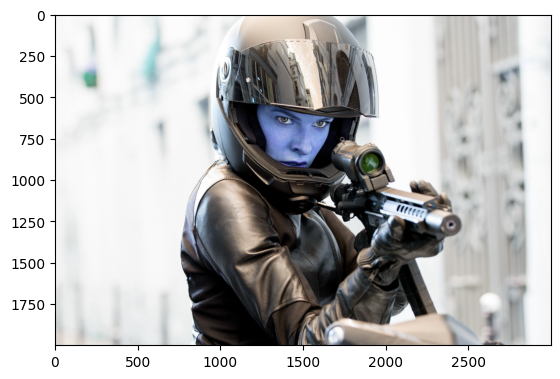

In [6]:
plt.imshow(bgr_img)

we see that there's a problem in color!!

`opencv` read image as `BGR` , probelm!

`matplotlib` read image as `RGB` , normal!

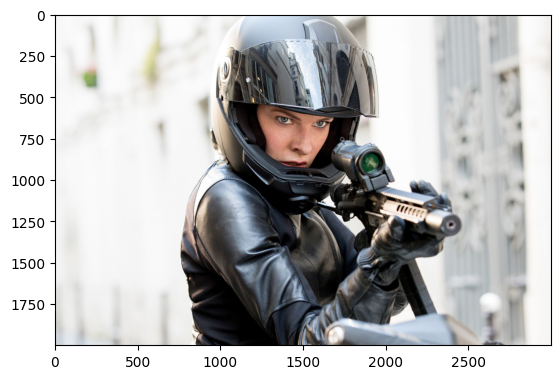

In [7]:
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB) # convert BGR to RGB
plt.imshow(rgb_img)

but stil use `bgr_img` along use opencv, because opencv doesn't support `RGB`.

save image with opencv

In [8]:
cv2.imwrite('imgs/save_test1.jpg', bgr_img)

True

load video

In [9]:
cap = cv2.VideoCapture(0) # run camera labtop
# cap = cv2.VideoCapture('path_video.mp4') # if i have a video, enter path

while (1): 
    ret, frame = cap.read() # read frame from camera labtop
    if ret:
        gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # convert video to gray
        
        cv2.imshow('original', bgr_img)
        cv2.imshow('gray', gray_img)
        
        if cv2.waitKey(10) & 0XFF == ord('q'): # exit from video with press key q
            break

cap.release()
cv2.destroyAllWindows()

# 2-Image Masking and Color Tracking

In [10]:
bgr_img = cv2.imread('imgs/test1.jpg', -1) # default
gray_img = cv2.imread('imgs/test1.jpg', 0) # 2-dimensional
rgb_img = cv2.imread('imgs/test1.jpg', 1) # 3-dimensional

cmap

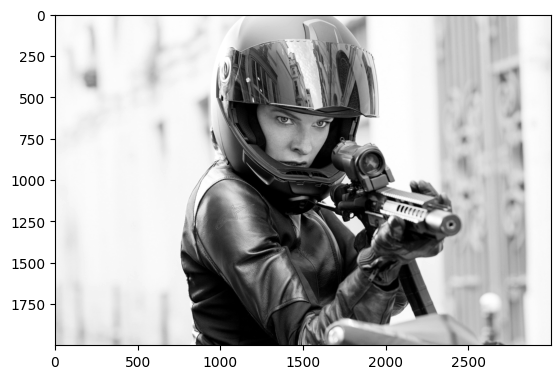

In [12]:
plt.imshow(gray_img, cmap='gray')

size

In [13]:
gray_img.shape

(2000, 3000)

In [14]:
np.zeros_like(gray_img)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
np.zeros_like(gray_img).shape

(2000, 3000)

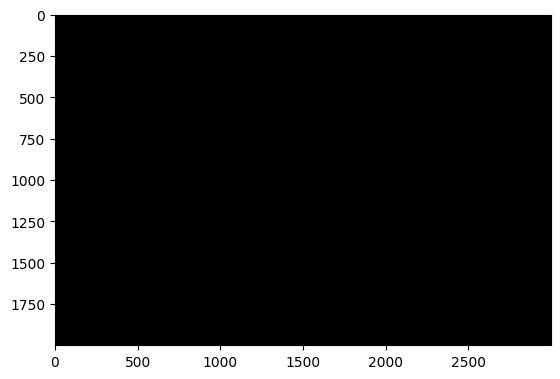

In [17]:
plt.imshow(np.zeros_like(gray_img), cmap='gray')

unsigned integer 8 : range from 0 to 255 

00000000 = 0

11111111 = 255

In [18]:
a = np.uint8([150])
b = np.uint8([150])
cv2.add(a, b)

array([[255]], dtype=uint8)

return 255 not 300

because max pixel of image is 255

In [19]:
a = np.uint8([150])
b = np.uint8([200])
cv2.subtract(a, b)

array([[0]], dtype=uint8)

return 0 not -50

because min pixel of image is 0 not found negative pixel

Task traking

!['hsv'](imgs/hsv.png)

Saturation is control in ratio white color

Value is control in ratio black color

In [21]:
cap = cv2.VideoCapture(0)

while (1):
    ret, frame = cap.read()
    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_limit = np.array([100, 100, 100])
        upper_limit = np.array([130, 255, 255])
         
        mask = cv2.inRange(hsv, lower_limit, upper_limit)
        res = cv2.bitwise_and(frame, frame, mask=mask)
        
        cv2.imshow('mask', mask)
        cv2.imshow('original', frame)
        cv2.imshow('result', frame)
         
        if cv2.waitKey(10) & 0XFF == ord('q'):
             break

cap.release()
cv2.destroyAllWindows()

# 3-Image Resizing Techniquee

1. Bed of mails : fail empty pixels with zeros
!["resize_zeros"](imgs/resize_zeros.png)

2. Nearest neighbors: fail empty pixels with same values as neighbors
!["resize_nn"](imgs/resize_nn.png)

3. Bilinear: fail empty pixels with random values between edges pixels
!["resize_random"](imgs/resize_random.png)

4. Cubic: fail empty pixels with value determined by 4 other neighbors
!["resize_cubic](imgs/resize_cubic.png)

Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

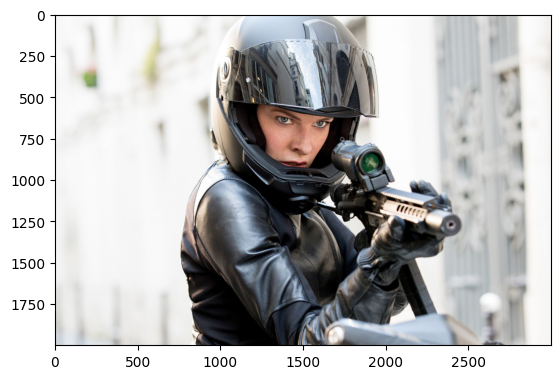

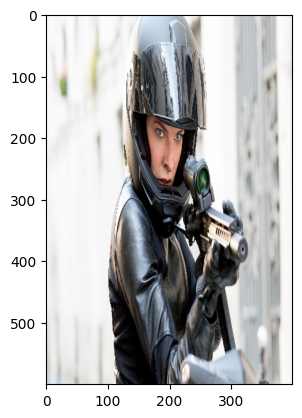

In [3]:
img = cv2.imread('imgs/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h = img.shape[0]
w = img.shape[1]
resized = cv2.resize(img, (int(h/5), int(w/5)), interpolation=cv2.INTER_LINEAR)
plt.imshow(img)
plt.show()
plt.imshow(resized)
plt.show()

# 4-Linear Transformation on images

Before Transformation
!["before_transformation"](imgs/before_transformation.png)

After Transformation
!["after_transformation"](imgs/after_transformation.png)

0,0 : change scale x-axis

1,1 : change scale y-axis


0,1 : share on x-axis to right

1,0 : share on y-axis to left


0,2 : positive shift to right and negative shift to left

1,2 : positive shift to up and negative shift to down

# 5-Linear Transformation-code

coding

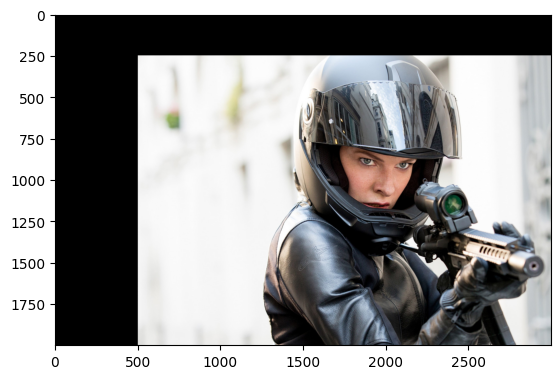

In [6]:
img = cv2.imread('imgs/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h = img.shape[0]
w = img.shape[1]

# Transformation
M = np.float32([[1, 0, 500],
               [0, 1, 250]])


dst = cv2.warpAffine(src= img, 
                     M= M,
                     dsize= (w,h))

plt.imshow(dst)

to make rotation by center

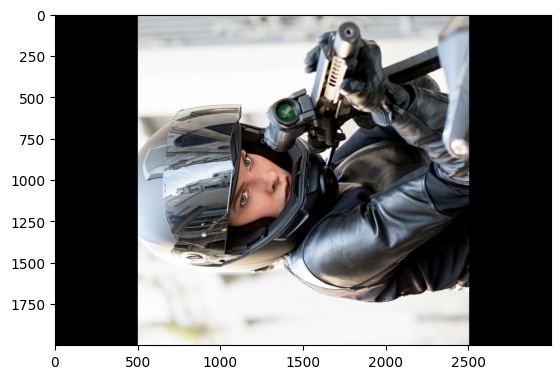

In [11]:
# 90 : rotation angle
# 1 : the same scale
M = cv2.getRotationMatrix2D(center= (w/2, h/2), 
                            angle= 90, 
                            scale= 1) 

dst = cv2.warpAffine(src= img, 
                     M= M,
                     dsize= (w,h))
plt.imshow(dst)

left rotation with 90 

move 3 points from position A to position B

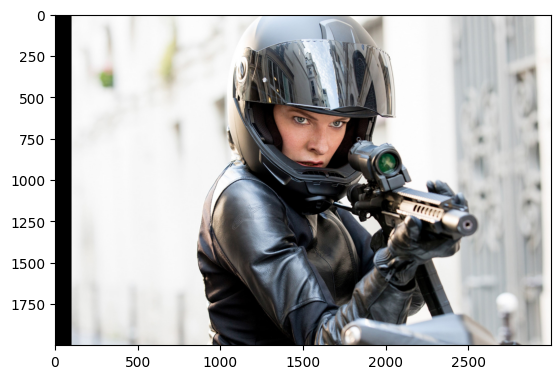

In [13]:
pts1 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]
                   ]
                  )

pts2 = np.float32([[110, 100],
                   [300, 50],
                   [200, 250]
                   ]
                  )

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(src= img, 
                     M= M,
                     dsize= (w,h))
plt.imshow(dst)

# 6-Image Filtering and noise reduction

Explain how to make filtering on image useing filter or kernal
!["filtering](imgs/filtering.png)

#### 1- Average Filter: make `smothing for edge sharp` 
!["average_filter"](imgs/average_filter.png)

Now i have a problem with `two points 0 and 90` in image!

To handel two points should be use `Average filter` with `box filter`

Point 0 : 8 x 90 / 9 = 80

Point 90 : 90 / 9 = 10

#### 2- Gussian distribution filter
!["gussian"](imgs/gussian.png)

Make `center pixel the important vote` more than other votes
!["gussian2"](imgs/gussian2.png)

#### 3- Median filter: sort pixels then take center pixel, not effected by high values
!["median"](median.png)

# 7- Image Filtering and noise reduction-code

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Text(0.5, 1.0, 'Average Filter')

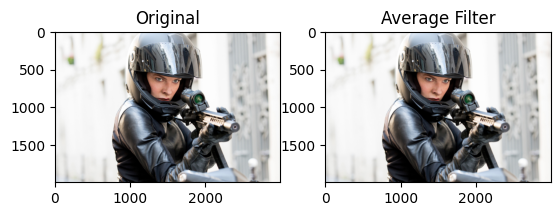

In [68]:
bgr_img = cv2.imread('imgs/test1.jpg')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# box filter 
# divide on 25 (number of pixels)
kernal = np.ones((5,5),dtype= np.float32) / 25
dst = cv2.filter2D(rgb_img, -1, kernal)
 
fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb_img)
ax[0].set_title("Original")
ax[1].imshow(dst)
ax[1].set_title("Average Filter")


in one step: `kernal with dst`

Text(0.5, 1.0, 'Average Filter')

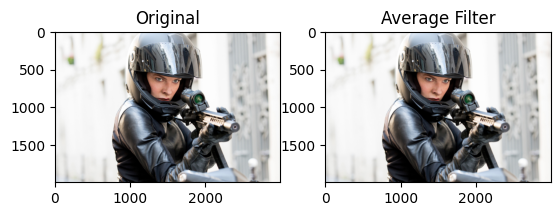

In [36]:
dst = cv2.blur(rgb_img, (5,5))

fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb_img)
ax[0].set_title("Original")
ax[1].imshow(dst)
ax[1].set_title("Average Filter")

Gaussian bluring

Text(0.5, 1.0, 'Gaussian Bluring')

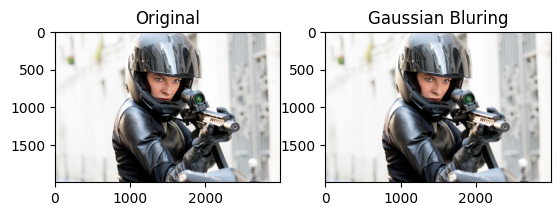

In [38]:
dst = cv2.GaussianBlur(rgb_img, (11, 11), 0)

fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb_img)
ax[0].set_title("Original")
ax[1].imshow(dst)
ax[1].set_title("Gaussian Filtering")

Median filter

Text(0.5, 1.0, 'Median Filtering 2')

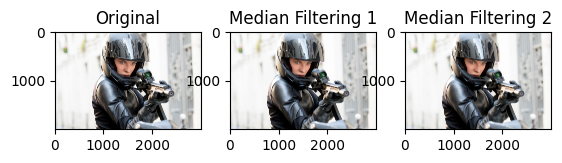

In [66]:
dst = cv2.medianBlur(rgb_img, ksize= 15)
dst2 = cv2.medianBlur(dst, ksize= 15)

fig, ax = plt.subplots(1,3)
ax[0].imshow(rgb_img)
ax[0].set_title("Original")
ax[1].imshow(dst)
ax[1].set_title("Median Filtering 1")
ax[2].imshow(dst2)
ax[2].set_title("Median Filtering 2")

# 8-Image Thresholding

#### 1. Binary Thresholding: 
!["binary_thresholding"](imgs/binary_thresholding.png)

#### 2. Adaptive Thresholding: solve or show areas less darking
     + adaptive mean using average technique
     + adaptive gaussian using voting for center and edges

!["adaptive_thresholding"](imgs/adaptive_thresholding.png)

#### 3. Auto Thresholding
    + based on histogram
    + used in case multi model or bimodel

!["auto_thresholding_1"](imgs/auto_thresholding_1.png)

or
!["auto_thresholding_2"](imgs/auto_thresholding_2.png)

# 9- Image Thresholding-code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Binary Threshold

Text(0.5, 1.0, 'Binary Inverse Image')

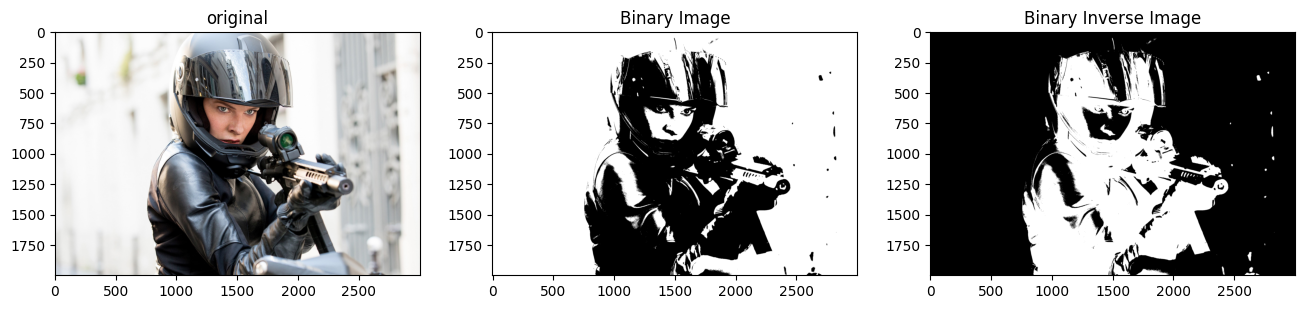

In [20]:
bgr_img = cv2.imread('imgs/test1.jpg')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

ret, thrsh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
ret, thrsh2 = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(16,12))

plt.subplot(131)
plt.imshow(rgb_img)
plt.title('original')

plt.subplot(132)
plt.imshow(thrsh, 'gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(thrsh2, 'gray')
plt.title('Binary Inverse Image')


Adaptive Threshold: show some parts

Text(0.5, 1.0, 'Adaptive THreshold with Gaussian')

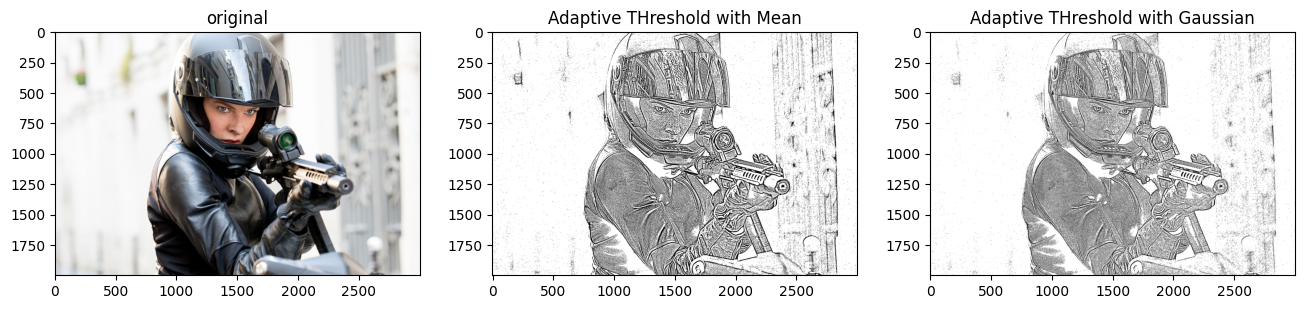

In [19]:
bgr_img = cv2.imread('imgs/test1.jpg')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

thrsh_mean = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thrsh_gaussian = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(16,12))

plt.subplot(131)
plt.imshow(rgb_img)
plt.title('original')

plt.subplot(132)
plt.imshow(thrsh_mean, 'gray')
plt.title('Adaptive THreshold with Mean')

plt.subplot(133)
plt.imshow(thrsh_gaussian, 'gray')
plt.title('Adaptive THreshold with Gaussian')

Text(0.5, 1.0, 'Auto Threshold OTSU')

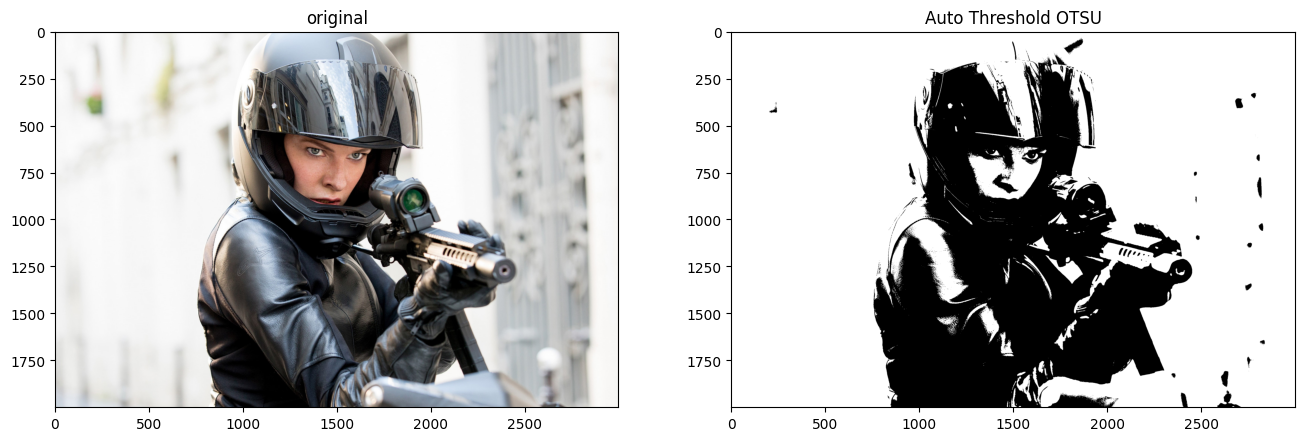

In [17]:
bgr_img = cv2.imread('imgs/test1.jpg')
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

ret, thrsh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

plt.figure(figsize=(16,12))

plt.subplot(121)
plt.imshow(rgb_img)
plt.title('original')

plt.subplot(122)
plt.imshow(thrsh, 'gray')
plt.title('Auto Threshold OTSU')


# 10- Morphological Transformation

#### 1. Erosion:
!["erosion1"](imgs/erosion1.png)

Erosion to descrease object: 

[0 1 0]

[1 1 1]

[0 1 0]

should be `all ones in erosion` are found too `all ones in image` to get `result one` otherwise result is zeros.

!["erosion2"](imgs/erosion2.png)

#### 2. Dilation
!["delicion1"](imgs/delicion1.png)

Dilation to increase object

[0 1 0]

[1 1 1]

[0 1 0]

should be `at least ones in dilation` are found too `at least ones in image` to get `result one` otherwise result is zeros.

!["delicion2"](imgs/delicion2.png)

#### 3. opening


opening is apply `Erosion` then `Dilation`

#### 4. Closeing

Closing is apply `Dilation` then `Erosion`

# 11- Morphological Transformation Code

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

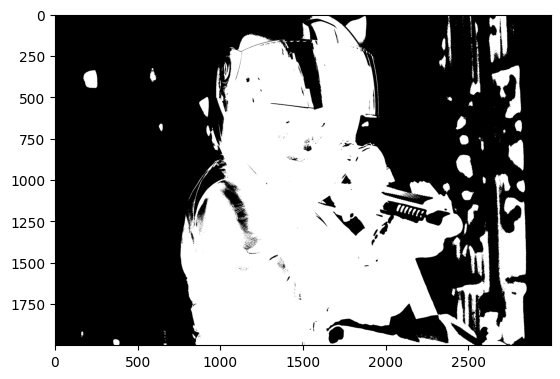

In [22]:
gray_img = cv2.imread('imgs/test1.jpg', 0)

ret, thrsh = cv2.threshold(gray_img, 190, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thrsh, 'gray')

threre's some problems in image so we should be solve by `Morphological`

Erosion: Descreasing the objects

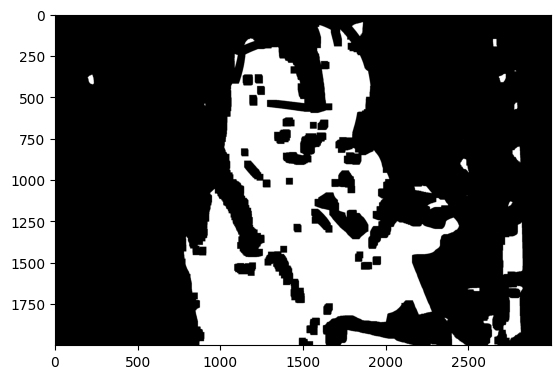

In [32]:
kernal = np.ones((5,5))
erosion= cv2.erode(thrsh, kernal, iterations=10)
plt.imshow(erosion, 'gray')

Dilation: Increasing the objects

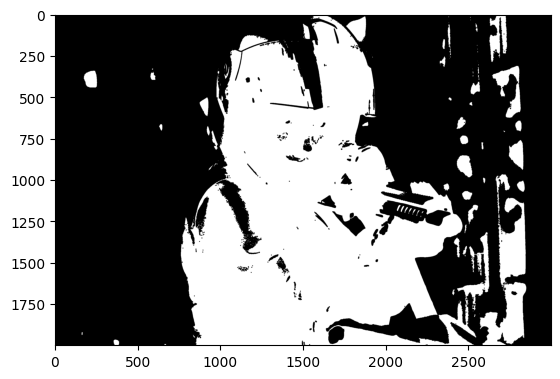

In [31]:
kernal = np.ones((5,5))
dilation= cv2.dilate(thrsh, kernal, iterations=15)
plt.imshow(erosion, 'gray')

Opining: apply `Erosion` then `Dilation`

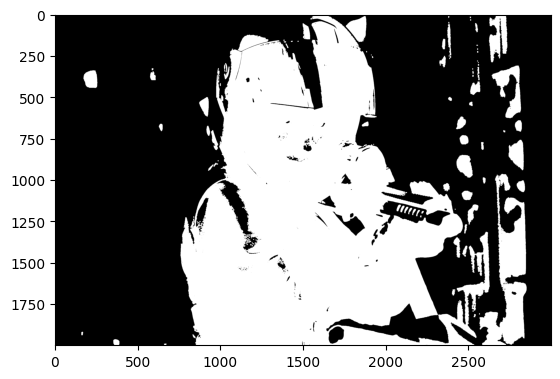

In [33]:
kernal = np.ones((5,5))
opining= cv2.morphologyEx(thrsh, cv2.MORPH_OPEN, kernal)
plt.imshow(opining, 'gray')

Opining: apply `Dilation` then `Erosion`

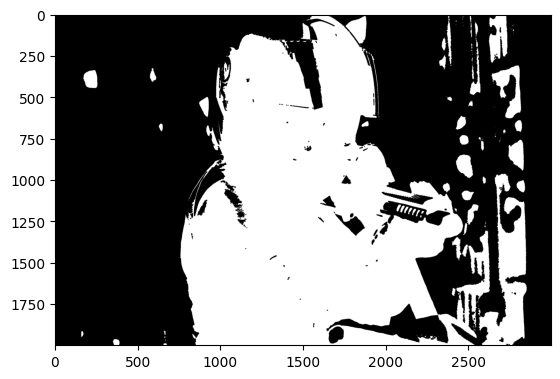

In [34]:
kernal = np.ones((5,5))
closing= cv2.morphologyEx(thrsh, cv2.MORPH_CLOSE, kernal)
plt.imshow(closing, 'gray')

Gradient: detect edges

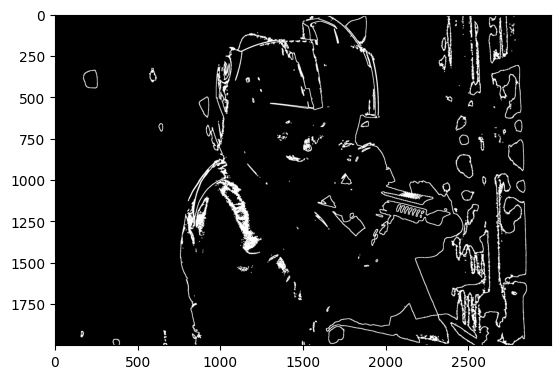

In [35]:
kernal = np.ones((5,5))
gradient = cv2.morphologyEx(thrsh, cv2.MORPH_GRADIENT, kernal)
plt.imshow(gradient, 'gray')

# 12- Edge Detection

#### 1. Prewitt

!["prewitt"](imgs/prewitt.png)

Detect vertical edges: X-axis

[1 0 -1]

[1 0 -1]

[1 0 -1]

Detect horizontal edges: Y-axis

[1 1 1]

[0 0 0]

[-1 -1 -1]

#### 2. Sobel 

!["sobel"](imgs/sobel.png)

Detect vertical edges: X-axis

[-1 0 1]

[-2 0 2]

[-1 0 1]

Detect horizontal edges: Y-axis 

[1 2 1]

[0 0 0]

[-1 -2 -1]

Gradient in sobel operation

!["gradient"](imgs/gradient.png)


#### 3. Scharr

!["scharr"](imgs/scharr.png)

#### 4. Laplacian

!["Laplacian"](imgs/laplacian.png)

#### 5. Canny: The most common 

Take the highest pixel value and cancel other pixels in same column
!["canny"](imgs/canny.png)

Then check with treshold if value is greater than threshold value then it's `Edge` otherwise it's `not edge`.

# 13- Edge Detection-Code

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Sobel

Text(0.5, 1.0, 'Sobel D')

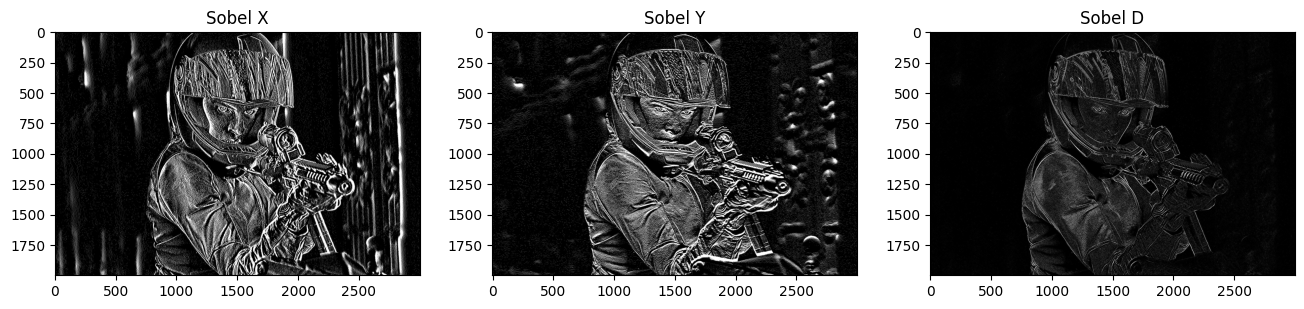

In [38]:
gray_img = cv2.imread('imgs/test1.jpg', 0)

# -1 : same format for image
sobel_x = cv2.Sobel(gray_img, -1, 1, 0, ksize=5) 
sobel_y = cv2.Sobel(gray_img, -1, 0, 1, ksize=5) 
sobel_d = cv2.Sobel(gray_img, -1, 1, 1, ksize=5) 

plt.figure(figsize=(16, 10))
plt.subplot(131)
plt.imshow(sobel_x, 'gray')
plt.title("Sobel X")

plt.subplot(132)
plt.imshow(sobel_y, 'gray')
plt.title("Sobel Y")

plt.subplot(133)
plt.imshow(sobel_d, 'gray')
plt.title("Sobel D")

Scharr

Text(0.5, 1.0, 'Scharr Y')

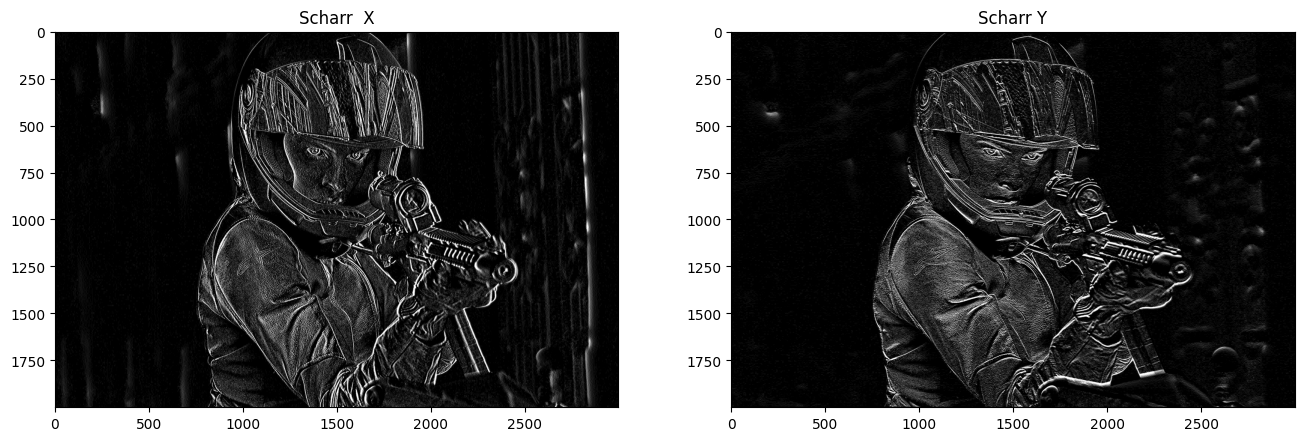

In [40]:
gray_img = cv2.imread('imgs/test1.jpg', 0)

# -1 : same format for image
scharr_x = cv2.Scharr(gray_img, -1, 1, 0, 5) 
scharr_y = cv2.Scharr(gray_img, -1, 0, 1, 5) 

plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.imshow(scharr_x, 'gray')
plt.title("Scharr  X")

plt.subplot(122)
plt.imshow(scharr_y, 'gray')
plt.title("Scharr Y")

Laplacian

Text(0.5, 1.0, 'Laplacian')

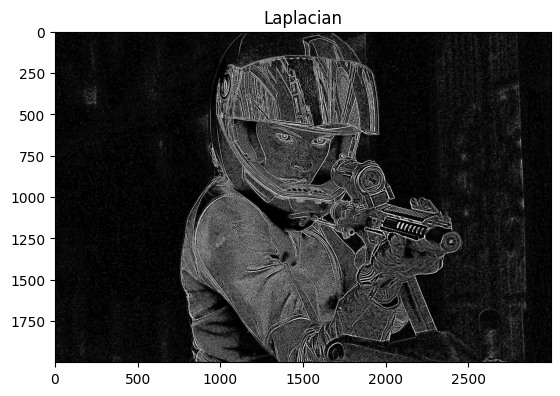

In [41]:
gray_img = cv2.imread('imgs/test1.jpg', 0)

# -1 : same format for image
laplacian = cv2.Laplacian(gray_img, -1, ksize=5) 

plt.imshow(laplacian, 'gray')
plt.title("Laplacian")

Canny: The most common 

Text(0.5, 1.0, 'Laplacian')

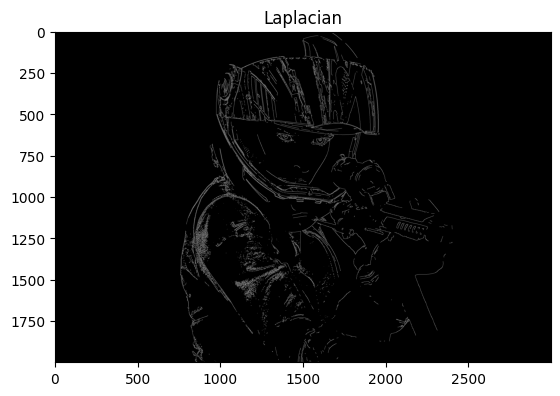

In [42]:
gray_img = cv2.imread('imgs/test1.jpg', 0)

# -1 : same format for image
# edge > 200
# not edge < 150
canny = cv2.Canny(gray_img, 150, 200) 

plt.imshow(canny, 'gray')
plt.title("Canny")

# 14-Images Features

`Good Features` that 

`appear` with the `appearance of the object` and 

`disappear` with `disappearance of the object`..

Such as: Top Eiffel Tower

!["features1"](imgs/features1.png)

The highest value of self difference is `Corners`

Corner is good feature 

!["features2"](imgs/features2.png)

Rule Harris corner detection:

!["features3"](imgs/features3.png)

# 15- Images Features-Code

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

+ To apply Harris operation we should be apply sobel

Text(0.5, 1.0, 'Harris with Dilation 15 itera')

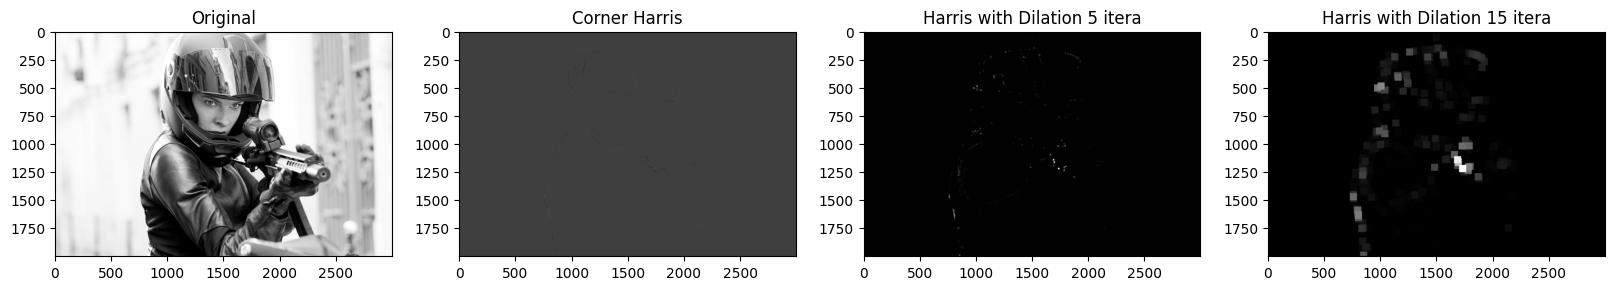

In [64]:
gray_img = cv2.imread('test1.jpg', 0)

# block size which move on image
# ksize which is kernal sobel size
# k which is self differance
corner= cv2.cornerHarris(gray_img, blockSize=4, ksize=3, k= 0.04)

corner1= cv2.dilate(corner, kernel= None, iterations=5) # increase objects
corner2= cv2.dilate(corner, kernel= np.ones((5,5)), iterations=15) # increase objects

plt.figure(figsize=(20, 15))
plt.subplot(141)
plt.imshow(gray_img, 'gray')
plt.title("Original")

plt.subplot(142)
plt.imshow(corner, 'gray')
plt.title("Corner Harris")

plt.subplot(143)
plt.imshow(corner1, 'gray')
plt.title("Harris with Dilation 5 itera")

plt.subplot(144)
plt.imshow(corner2, 'gray')
plt.title("Harris with Dilation 15 itera")

# 16-Sift Approach and feature matching

`Sift`: Solve in case different scales or rotations

+ Octaves:
    - apply gaussian bluring
    - apply resizeing

    - again apply gaussian blurring
    - again apply resizeing

    - again apply gaussian blurring
    - again apply resizeing

    - again apply gaussian blurring
    - again apply resizeing

    - again apply gaussian blurring
    - again apply resizeing

!["Octave"](imgs/Octave.png)

`subtract_1` : gaussian_1 from gaussian_2 

`subtract_2` : gaussian_2 from gaussian_3

`subtract_3` : gaussian_3 from gaussian_4

`subtract_4` : gaussian_4 from gaussian_5

Result from all gaussian operations are `Edges`

!["Octave2"](imgs/Octave2.png)

select 9 pixels then show which the highest pixel

!["Octave3"](imgs/Octave3.png)

distrubation pixel as histogram

!["Octave4"](imgs/Octave4.png)

get keypoints 

!["Octave5"](imgs/Octave5.png)

Matching pixels

!["Octave6"](imgs/Octave6.png)

# 17 - Sift Approach and feature matching-Code

In [65]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

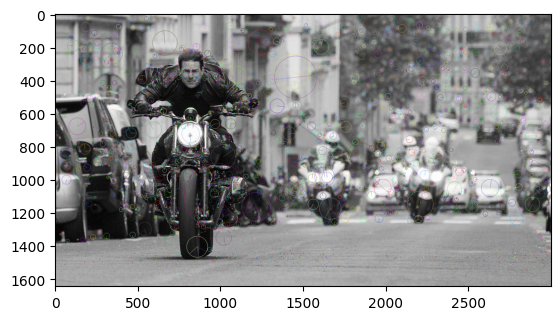

In [70]:
bgr_img = cv2.imread('imgs/test2.jpg') 
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create(edgeThreshold=5)
key_points = sift.detect(gray_img, None)
img = cv2.drawKeypoints(gray_img, key_points, bgr_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img, 'gray')

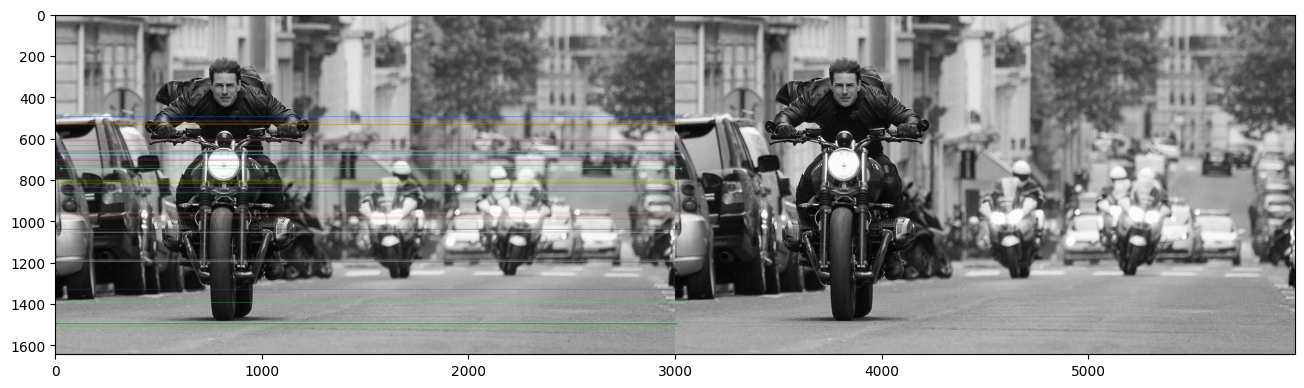

In [74]:
gray_img_1 = cv2.imread('imgs/test2.jpg', 0) 
gray_img_2 = cv2.imread('imgs/test2.jpg', 0) 

sift = cv2.SIFT_create()

key_points_1, des_1 = sift.detectAndCompute(gray_img_1, None)
key_points_2, des_2 = sift.detectAndCompute(gray_img_2, None)

bf = cv2.BFMatcher()
matches = bf.match(des_1, des_2)
matches = sorted(matches, key=lambda x: x.distance)

img = cv2.drawMatches(gray_img_1, key_points_1, gray_img_2, key_points_2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(16, 10))
plt.imshow(img, 'gray')